In [517]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [518]:
ds=pd.read_csv("titanic.csv")

In [519]:
ds.shape

(891, 12)

<AxesSubplot:xlabel='Survived', ylabel='count'>

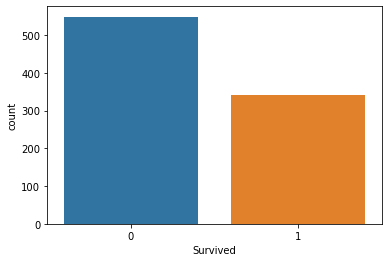

In [520]:
sns.countplot(ds["Survived"])

Class balance problem

In [521]:
ds.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [522]:
ds.Survived.unique()

array([0, 1], dtype=int64)

In [523]:
ds["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [524]:
ds["PassengerId"].value_counts()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

In [525]:
ds["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [526]:
ds["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [527]:
ds["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [528]:
ds["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [529]:
ds["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [530]:
ds["Ticket"].value_counts()

347082              7
CA. 2343            7
1601                7
347088              6
3101295             6
                   ..
SOTON/O2 3101287    1
349242              1
S.C./A.4. 23567     1
345767              1
PC 17610            1
Name: Ticket, Length: 681, dtype: int64

Dropping ticket column as ticket column does not gives any data

In [531]:
ds.drop("Ticket",axis=1,inplace=True)

Dropping name column as ticket column does not gives any data

In [532]:
ds.drop("Name",axis=1,inplace=True)

In [533]:
ds

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [534]:
ds["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [535]:
ds["Cabin"].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F33            3
              ..
A10            1
C54            1
D49            1
B3             1
D47            1
Name: Cabin, Length: 147, dtype: int64

In [536]:
ds["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [537]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2 nan values are present in embarked column also

<AxesSubplot:>

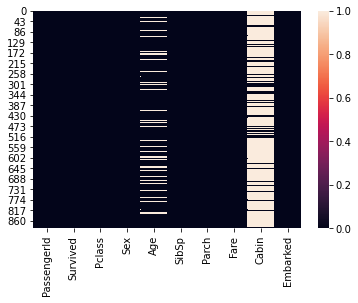

In [538]:
sns.heatmap(ds.isnull())

There are null values present in the age column, embarked column and cabin column

# Treating the null values of column age, embarked column and dropping the embarked column

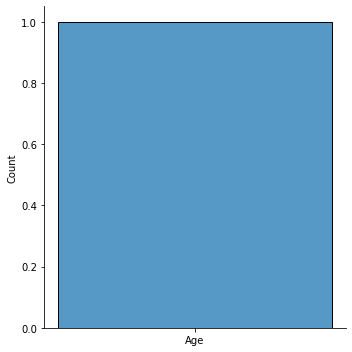

In [539]:
sns.displot(["Age"])

Mean will be used to remove the null values as it the graph is normally distributed

In [540]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp=imp.fit(ds[["Embarked"]])
ds["Embarked"]=imp.transform(ds[["Embarked"]])

In [541]:
ds["Age"]=ds["Age"].fillna(ds["Age"].mean())

<AxesSubplot:>

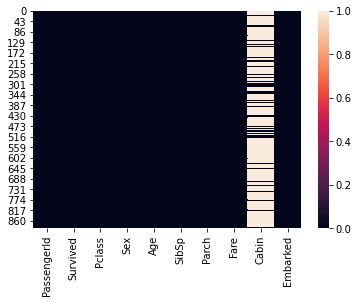

In [542]:
sns.heatmap(ds.isnull())


dropping the cabin column as there are more null values

In [543]:
ds.drop("Cabin",axis=1,inplace=True)

In [544]:
ds.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:>

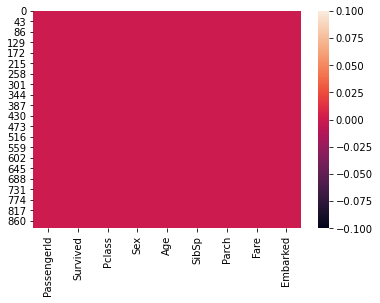

In [545]:
sns.heatmap(ds.isnull())

No null values are present in the dataset

In [546]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

no null values present in the dataset

In [547]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
ds["Sex"]=LE.fit_transform(ds["Sex"])

In [548]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
ds["Embarked"]=LE.fit_transform(ds["Embarked"])

label encoding is done for categorcal columns


In [549]:
ds["Embarked"].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [550]:
ds["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

data analysis is done and also data is prepared to move forward

ds.dtypes

In [551]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [552]:
ds.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


satatistical summary of the data

<AxesSubplot:>

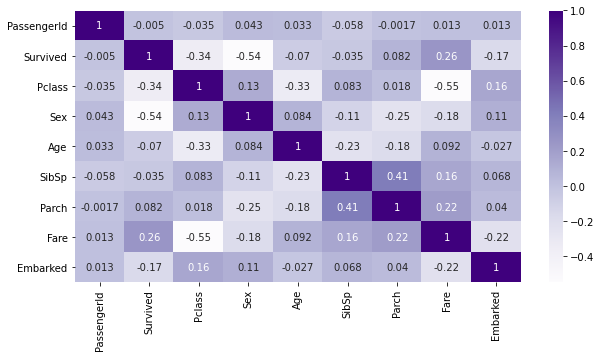

In [553]:
fig=plt.figure(figsize=(10,5))
hc=ds.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Purples")

There is no such highly coorelation between the columns but pclass is negatively corrletaed with fare and also SibSp column is positively correlated with Parch 

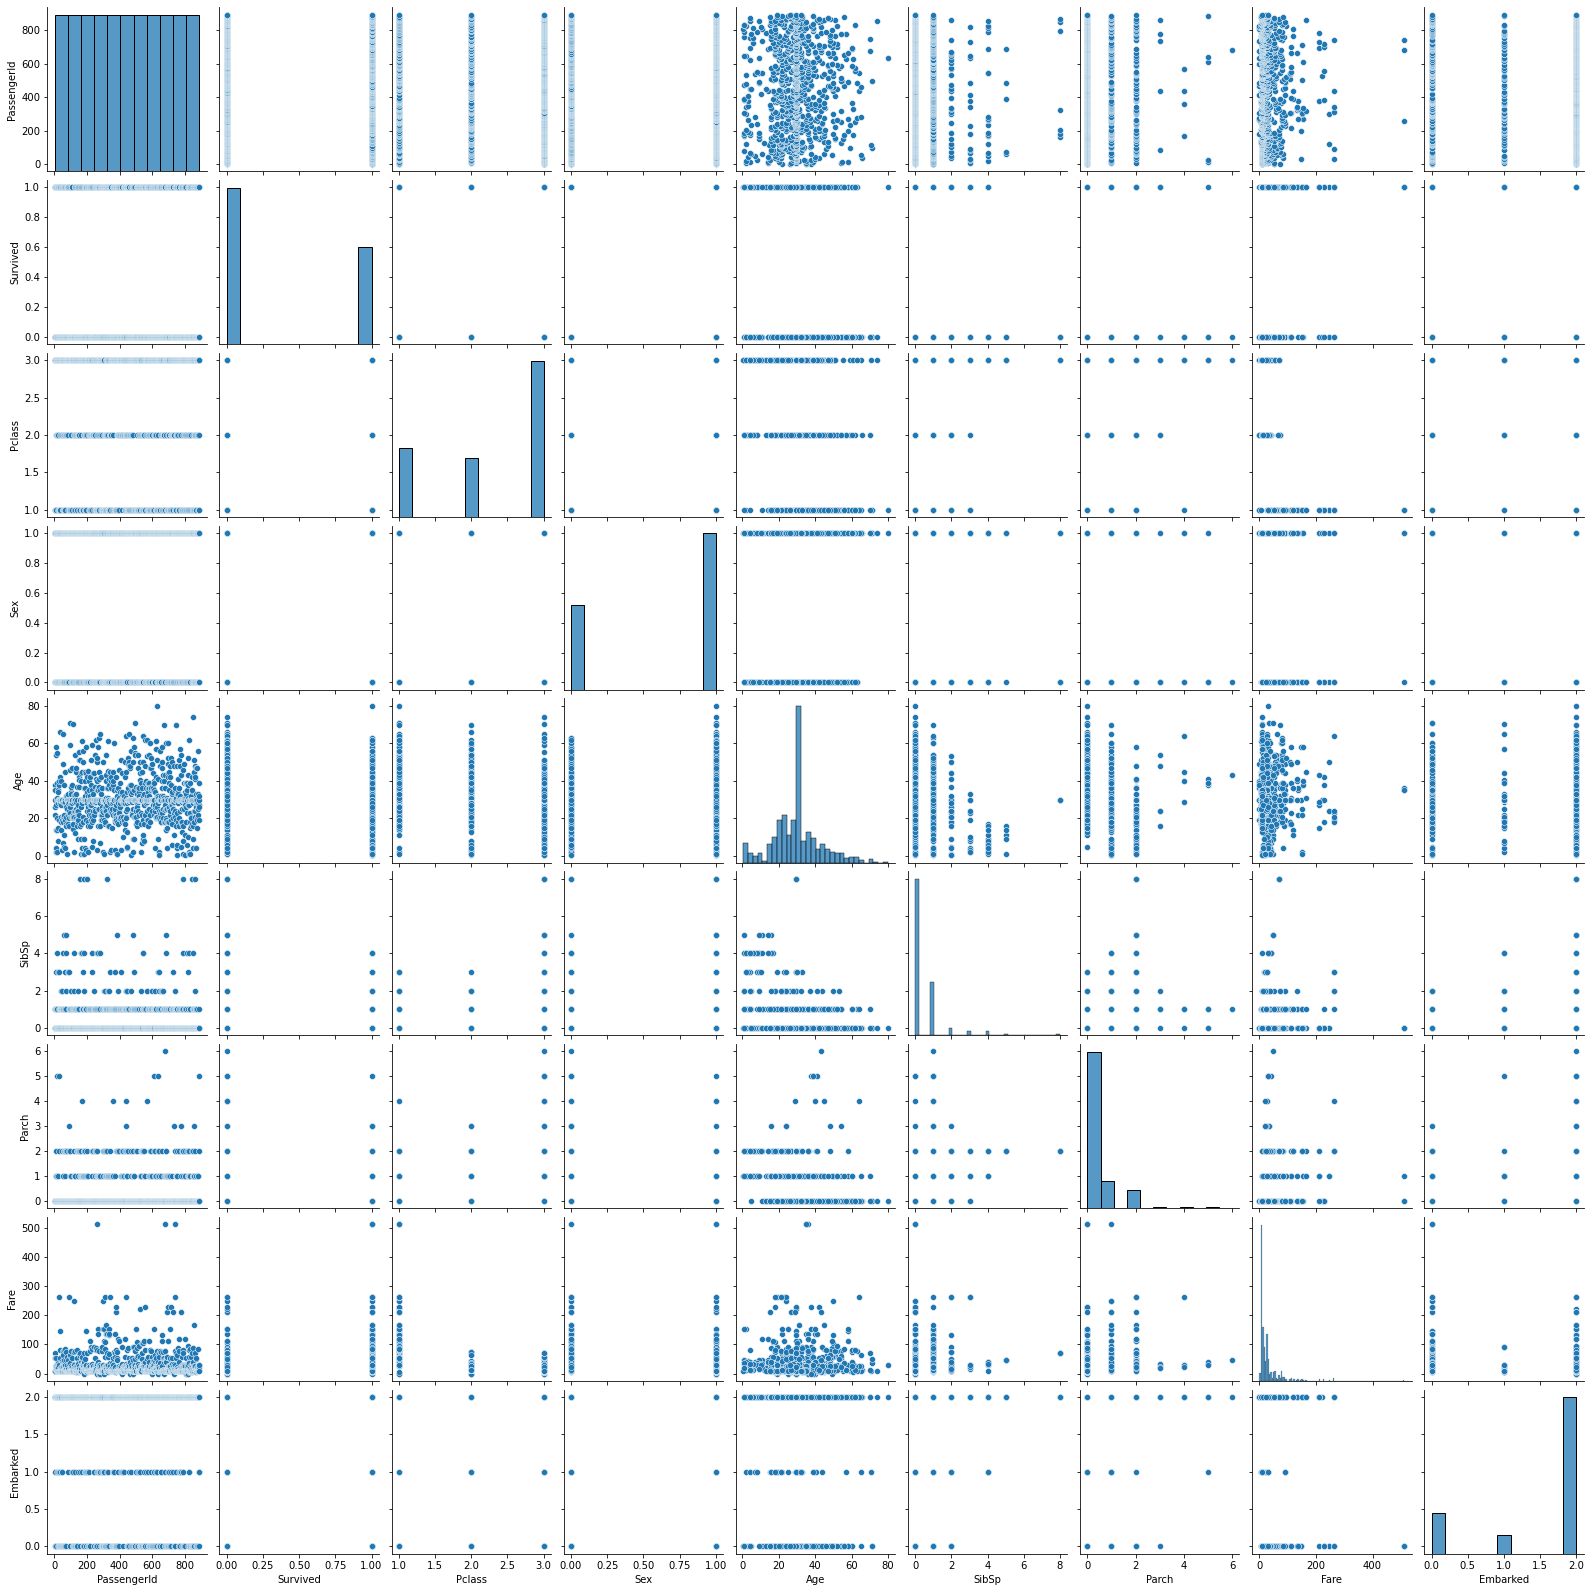

In [554]:
sns.pairplot(ds)

coorleation of columns through plots

In [555]:
ds.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

skewness is present in the dataset in some columns

<AxesSubplot:xlabel='PassengerId', ylabel='Count'>

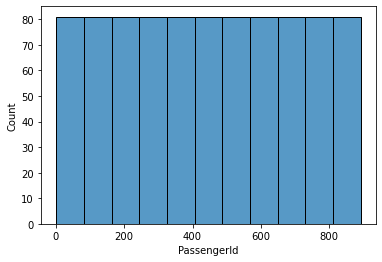

In [556]:
sns.histplot(ds["PassengerId"])

<Figure size 432x288 with 0 Axes>

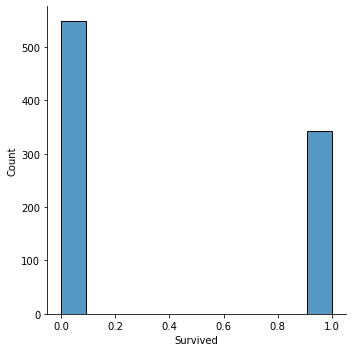

<Figure size 432x288 with 0 Axes>

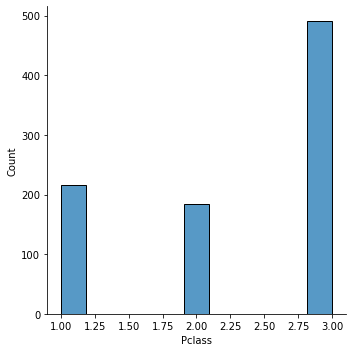

<Figure size 432x288 with 0 Axes>

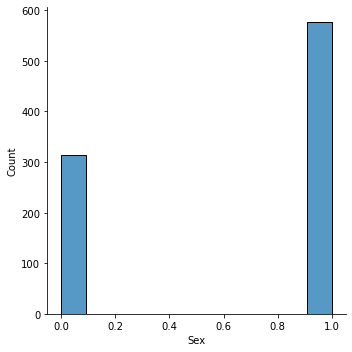

<Figure size 432x288 with 0 Axes>

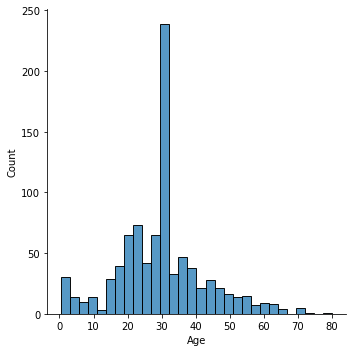

<Figure size 432x288 with 0 Axes>

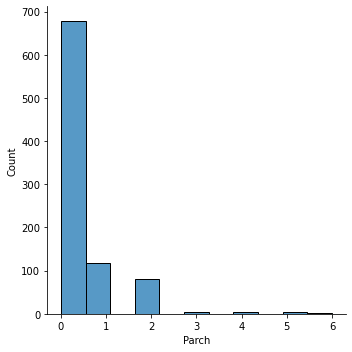

<Figure size 432x288 with 0 Axes>

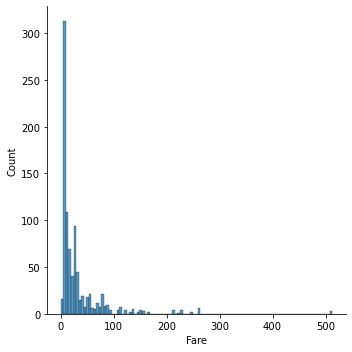

<Figure size 432x288 with 0 Axes>

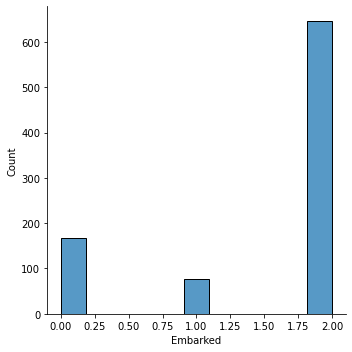

<Figure size 432x288 with 0 Axes>

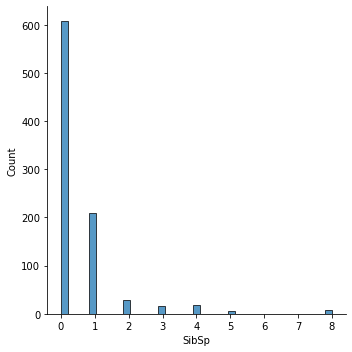

In [557]:
columns=["Survived","Pclass","Sex","Age","Parch","Fare","Embarked","SibSp"]

for i in ds[columns]:
    plt.figure()
    sns.displot(ds[i])

skewness is shown through the graph

PassengerId       AxesSubplot(0.125,0.125;0.0731132x0.755)
Survived       AxesSubplot(0.212736,0.125;0.0731132x0.755)
Pclass         AxesSubplot(0.300472,0.125;0.0731132x0.755)
Sex            AxesSubplot(0.388208,0.125;0.0731132x0.755)
Age            AxesSubplot(0.475943,0.125;0.0731132x0.755)
SibSp          AxesSubplot(0.563679,0.125;0.0731132x0.755)
Parch          AxesSubplot(0.651415,0.125;0.0731132x0.755)
Fare           AxesSubplot(0.739151,0.125;0.0731132x0.755)
Embarked       AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

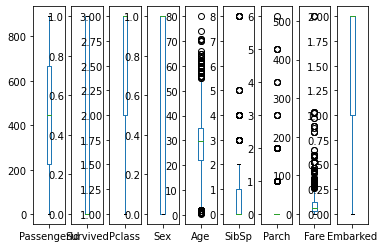

In [558]:
ds.plot(kind="box",subplots=True,layout=(1,9))

outliers are present in the dataset

In [559]:
ds.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

In [560]:
from scipy.stats import zscore
z=np.abs(zscore(ds))
threshold=3
ds_new=ds[(z<3).all(axis=1)]

In [561]:
print("shape before and after")
print("shape before".ljust(20),":",ds.shape)
print("shape after".ljust(20),":",ds_new.shape)
print("percentage loss".ljust(20),":",(ds.shape[0]-ds_new.shape[0])/ds.shape[0])

shape before and after
shape before         : (891, 9)
shape after          : (820, 9)
percentage loss      : 0.07968574635241302


In [562]:
ds.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

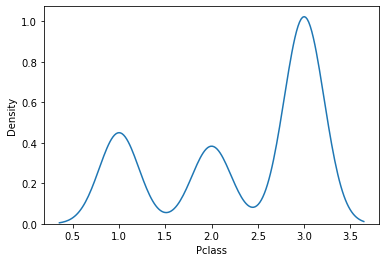

In [563]:
sns.kdeplot(ds["Pclass"])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

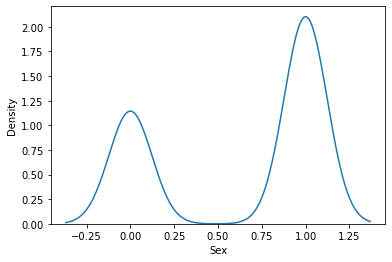

In [564]:
sns.kdeplot(ds["Sex"])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

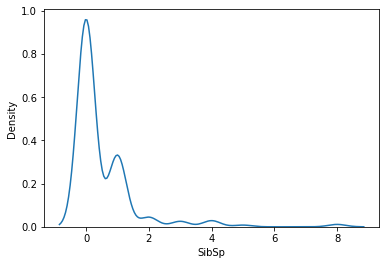

In [565]:
sns.kdeplot(ds["SibSp"])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

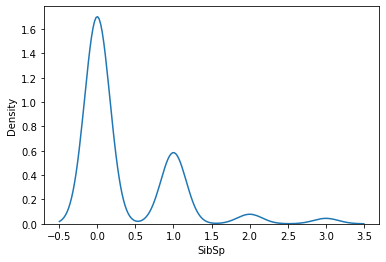

In [566]:
quant=ds["SibSp"].quantile(.98)
new=ds["SibSp"][ds["SibSp"]<quant]
sns.kdeplot(new)

<AxesSubplot:xlabel='Parch', ylabel='Density'>

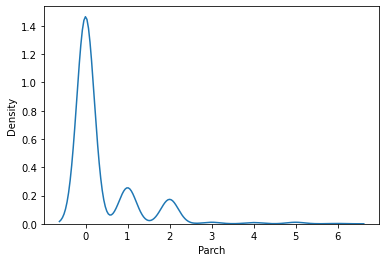

In [567]:
sns.kdeplot(ds["Parch"])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

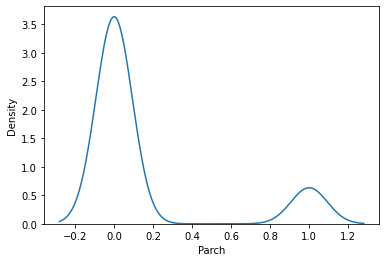

In [568]:
quant=ds["Parch"].quantile(.98)
new=ds["Parch"][ds["Parch"]<quant]
sns.kdeplot(new)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

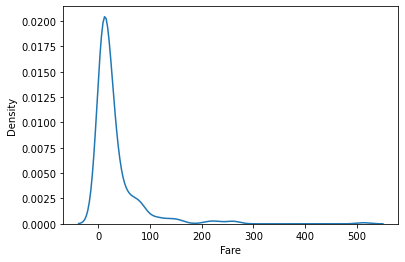

In [569]:
sns.kdeplot(ds["Fare"])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

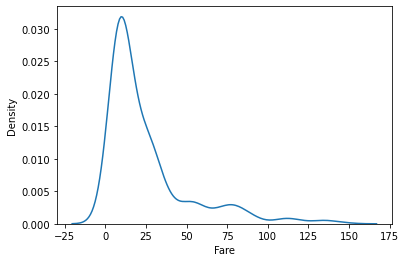

In [570]:
quant=ds["Fare"].quantile(.97)
new=ds["Fare"][ds["Fare"]<quant]
sns.kdeplot(new)

In [571]:
quant1=ds["SibSp"].quantile(.98)
quant2=ds["Parch"].quantile(.98)
quant3=ds["Fare"].quantile(.97)

In [572]:
ds=ds[ds["SibSp"]<quant1]
print(ds.shape)
ds=ds[ds["Parch"]<quant2]
print(ds.shape)
ds=ds[ds["Fare"]<quant3]
print(ds.shape)

(861, 9)
(787, 9)
(769, 9)


In [573]:
ds.skew()

PassengerId   -0.002557
Survived       0.542643
Pclass        -0.668017
Sex           -0.799614
Age            0.662623
SibSp          1.981601
Parch          2.187170
Fare           2.228685
Embarked      -1.252955
dtype: float64

In [574]:
ds_new["Embarked"].skew()

-1.2773859323294003

In [575]:
ds_new.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.277386
dtype: float64

tried as much outliers can be remooved

In [576]:
x=ds_new.drop(columns=["Survived"])
y=ds_new[["Survived"]]

In [577]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)

x1=pd.DataFrame(x,columns=x.columns)
x1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,2
1,2,1,0,38.000000,1,0,71.2833,0
2,3,3,0,26.000000,0,0,7.9250,2
3,4,1,0,35.000000,1,0,53.1000,2
4,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,2
887,888,1,0,19.000000,0,0,30.0000,2
888,889,3,0,29.699118,1,2,23.4500,2
889,890,1,1,26.000000,0,0,30.0000,0


scalled the input data to make mean and standard scaler as 1

In [578]:
x1.shape

(820, 8)

In [579]:
y.shape

(820, 1)

In [580]:
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=.22,random_state=43)
print(x1_train.shape)
print(x1_test.shape)
print(y_train.shape)
print(y_test.shape)

(639, 8)
(181, 8)
(639, 1)
(181, 1)


In [581]:
lg=LogisticRegression()
lg.fit(x1_train,y_train)
pred=lg.predict(x1_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8287292817679558
[[97 16]
 [15 53]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       113
           1       0.77      0.78      0.77        68

    accuracy                           0.83       181
   macro avg       0.82      0.82      0.82       181
weighted avg       0.83      0.83      0.83       181



In [582]:
gnb=GaussianNB()
gnb.fit(x1_train,y_train)
predg=gnb.predict(x1_test)
print("accuracy score:",)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score:
0.8342541436464088
[[95 18]
 [12 56]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       113
           1       0.76      0.82      0.79        68

    accuracy                           0.83       181
   macro avg       0.82      0.83      0.83       181
weighted avg       0.84      0.83      0.84       181



In [583]:
sv=SVC()
sv.fit(x1_train,y_train)
pred2=sv.predict(x1_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

accuracy score:
0.7071823204419889
[[112   1]
 [ 52  16]]
              precision    recall  f1-score   support

           0       0.68      0.99      0.81       113
           1       0.94      0.24      0.38        68

    accuracy                           0.71       181
   macro avg       0.81      0.61      0.59       181
weighted avg       0.78      0.71      0.65       181



In [584]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x1_train,y_train)
pred3=rf.predict(x1_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

accuracy score:
0.8397790055248618
[[102  11]
 [ 18  50]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       113
           1       0.82      0.74      0.78        68

    accuracy                           0.84       181
   macro avg       0.83      0.82      0.83       181
weighted avg       0.84      0.84      0.84       181



In [585]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x1_train,y_train)
pred4=ad.predict(x1_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

accuracy score:
0.8232044198895028
[[95 18]
 [14 54]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       113
           1       0.75      0.79      0.77        68

    accuracy                           0.82       181
   macro avg       0.81      0.82      0.81       181
weighted avg       0.83      0.82      0.82       181



cross validation

In [586]:
score=cross_val_score(sv,x1,y,cv=5)
print(score)
print(score.mean())

[0.61585366 0.66463415 0.67073171 0.67073171 0.63414634]
0.651219512195122


In [587]:
score=cross_val_score(lg,x1,y,cv=5)
print(score)
print(score.mean())

[0.81097561 0.79268293 0.7804878  0.7804878  0.79878049]
0.7926829268292683


In [588]:
score=cross_val_score(gnb,x1,y,cv=5)
print(score)
print(score.mean())

[0.7195122  0.79268293 0.77439024 0.79268293 0.80487805]
0.7768292682926828


In [589]:
score=cross_val_score(rf,x1,y,cv=5)
print(score)
print(score.mean())

[0.73170732 0.79268293 0.84146341 0.80487805 0.80487805]
0.7951219512195122


In [590]:
score=cross_val_score(ad,x1,y,cv=5)
print(score)
print(score.mean())

[0.62804878 0.7804878  0.79878049 0.80487805 0.64634146]
0.7317073170731708


Best is random forest

In [591]:
joblib.dump(rf,"titanic_final.obj")
print("object of the dataset has been created")

object of the dataset has been created


In [592]:
final_titanic=joblib.load("titanic_final.obj")
final_titanic.predict(x1_train)

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,